# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information from over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 15 years ago. So if today is 2024.05.17 then the weather we want to forecast is for the date 2009.05.18. You are supposed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to use BigQuery in Jupyter Notebook refer to the Google Docs.

The goal of this test is to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck in the first part, you can use the replacement data provided in the second part

In [1]:
%load_ext google.cloud.bigquery

In [ ]:
# install requirements
!pip install -r requirements.txt

In [3]:
# install the BigQuery Python client library to run a BigQuery query in Google Colab
!pip install google-cloud-bigquery

In [4]:
# authenticate Google account
!gcloud auth application-default login

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=2wmos1VFCqvCKyf1qKo1i6Nbb9T042&prompt=consent&token_usage=remote&access_type=offline&code_challenge=oIKSgWsx25bTrWlGYKzMMZaEQE-b0SpGWrrnhoRqDK8&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 4/0AdLIrYcdROdyajJp0WGEeTBVcrdB7Y_F7OFLW6sYAltvriYYlSj4YEIRi5Tszovvi-c1bw

Credentials saved to file: [/content/.config/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Q

In [5]:
# set default project
!gcloud config set project learnings-424810

Updated property [core/project].


In [6]:
# explicitly set the environment variable
import os

project_id = "learnings-424810"

os.environ["GOOGLE_CLOUD_PROJECT"] = project_id

## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2009 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010.

In [7]:
from google.cloud import bigquery

# list all columns from dataset
client = bigquery.Client()

table_id = "bigquery-public-data.samples.gsod"

table = client.get_table(table_id)

print(table.schema)

[SchemaField('station_number', 'INTEGER', 'REQUIRED', None, 'The World Meteorological Organization (WMO) / DATSAV3 station number where the data was collected.', (), None), SchemaField('wban_number', 'INTEGER', 'NULLABLE', None, 'The Weather-Bureau-Army-Navy (WBAN) station number where the data was collected.', (), None), SchemaField('year', 'INTEGER', 'REQUIRED', None, 'The year the data was collected in', (), None), SchemaField('month', 'INTEGER', 'REQUIRED', None, 'The month the data was collected in', (), None), SchemaField('day', 'INTEGER', 'REQUIRED', None, 'The day the data was collected in.', (), None), SchemaField('mean_temp', 'FLOAT', 'NULLABLE', None, 'The mean temperature of the day in degrees Fahrenheit, accurate to one tenth of a degree.', (), None), SchemaField('num_mean_temp_samples', 'INTEGER', 'NULLABLE', None, 'The number of observations used to calculate mean_temp.', (), None), SchemaField('mean_dew_point', 'FLOAT', 'NULLABLE', None, 'The mean dew point of the day i

In [8]:
# update query to filter data according to requirements
query = """
SELECT
  *,
  FORMAT_TIMESTAMP('%Y-%m-%d', TIMESTAMP(CONCAT(year, '-', month, '-', day))) AS date
FROM `bigquery-public-data.samples.gsod`
WHERE station_number BETWEEN 725300 AND 726300
  AND year BETWEEN 2005 AND 2009
"""

from google.cloud import bigquery

client = bigquery.Client()

weather_data = client.query(query).to_dataframe()

In [9]:
# reorder dataset
import pandas as pd

# drop date columns
weather_data = weather_data.drop(columns=['year', 'month', 'day'])

# reorder columns
columns = ['date'] + [col for col in weather_data.columns if col != 'date']
weather_data = weather_data[columns]

# sort by date
weather_data = weather_data.sort_values(by='date')

# reset index
weather_data.reset_index(drop=True, inplace=True)

In [10]:
weather_data.head()

,date,station_number,wban_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2005-01-01,725845,23225,26.100000,24,25.200001,24,1013.000000,18,NaN,...,NaN,<NA>,0.14,NaN,True,True,True,True,True,True
1,2005-01-01,725958,99999,29.299999,24,23.900000,24,1007.799988,20,NaN,...,NaN,<NA>,0.11,NaN,True,True,True,True,True,True
2,2005-01-01,725466,99999,29.799999,24,20.700001,24,NaN,<NA>,NaN,...,NaN,<NA>,0.00,NaN,True,True,True,True,True,True
3,2005-01-01,725477,99999,29.700001,24,18.500000,24,NaN,<NA>,NaN,...,NaN,<NA>,0.00,NaN,True,True,True,True,True,True
4,2005-01-01,725376,14853,34.799999,24,25.299999,24,1028.400024,24,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False


In [11]:
weather_data.tail()

,date,station_number,wban_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
377779,2009-12-31,726083,4836,2.600000,24,-1.2,24,1024.099976,24,NaN,...,NaN,<NA>,0.0,NaN,False,False,False,False,False,False
377780,2009-12-31,725976,94285,18.400000,24,15.7,24,NaN,<NA>,NaN,...,NaN,<NA>,0.0,NaN,False,False,False,False,False,False
377781,2009-12-31,725660,24028,24.500000,24,15.3,24,1021.599976,24,NaN,...,NaN,<NA>,0.0,NaN,False,False,False,False,False,False
377782,2009-12-31,725497,4908,12.800000,24,7.3,24,NaN,<NA>,NaN,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
377783,2009-12-31,726079,94601,22.799999,24,14.5,24,NaN,<NA>,NaN,...,NaN,<NA>,0.0,NaN,False,False,False,False,False,False


### 2. Task
From here you want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2009.

In [12]:
# list all columns
print(weather_data.columns)

Index(['date', 'station_number', 'wban_number', 'mean_temp',
       'num_mean_temp_samples', 'mean_dew_point', 'num_mean_dew_point_samples',
       'mean_sealevel_pressure', 'num_mean_sealevel_pressure_samples',
       'mean_station_pressure', 'num_mean_station_pressure_samples',
       'mean_visibility', 'num_mean_visibility_samples', 'mean_wind_speed',
       'num_mean_wind_speed_samples', 'max_sustained_wind_speed',
       'max_gust_wind_speed', 'max_temperature', 'max_temperature_explicit',
       'min_temperature', 'min_temperature_explicit', 'total_precipitation',
       'snow_depth', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado'],
      dtype='object')


Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate.

In [13]:
# missing values
print(weather_data.isnull().sum())

date                                       0
station_number                             0
wban_number                                0
mean_temp                                  0
num_mean_temp_samples                      0
mean_dew_point                           158
num_mean_dew_point_samples               158
mean_sealevel_pressure                145847
num_mean_sealevel_pressure_samples    145847
mean_station_pressure                 369069
num_mean_station_pressure_samples     369069
mean_visibility                         9679
num_mean_visibility_samples             9679
mean_wind_speed                          360
num_mean_wind_speed_samples              360
max_sustained_wind_speed                1092
max_gust_wind_speed                   130899
max_temperature                           98
max_temperature_explicit                  98
min_temperature                       377784
min_temperature_explicit              377784
total_precipitation                    45344
snow_depth

In [14]:
# drop columns with high missing values or that are less relevant to the prediction task (e.g. columns indicating the number of samples used to calculate the means)
columns_to_drop = [
    'wban_number',
    'num_mean_temp_samples',
    'num_mean_dew_point_samples',
    'num_mean_sealevel_pressure_samples',
    'num_mean_station_pressure_samples',
    'num_mean_visibility_samples',
    'num_mean_wind_speed_samples',
    'mean_sealevel_pressure',
    'mean_station_pressure',
    'min_temperature',
    'min_temperature_explicit',
    'snow_depth',
    'max_gust_wind_speed',
    'max_temperature_explicit'
]

weather_data = weather_data.drop(columns=columns_to_drop)

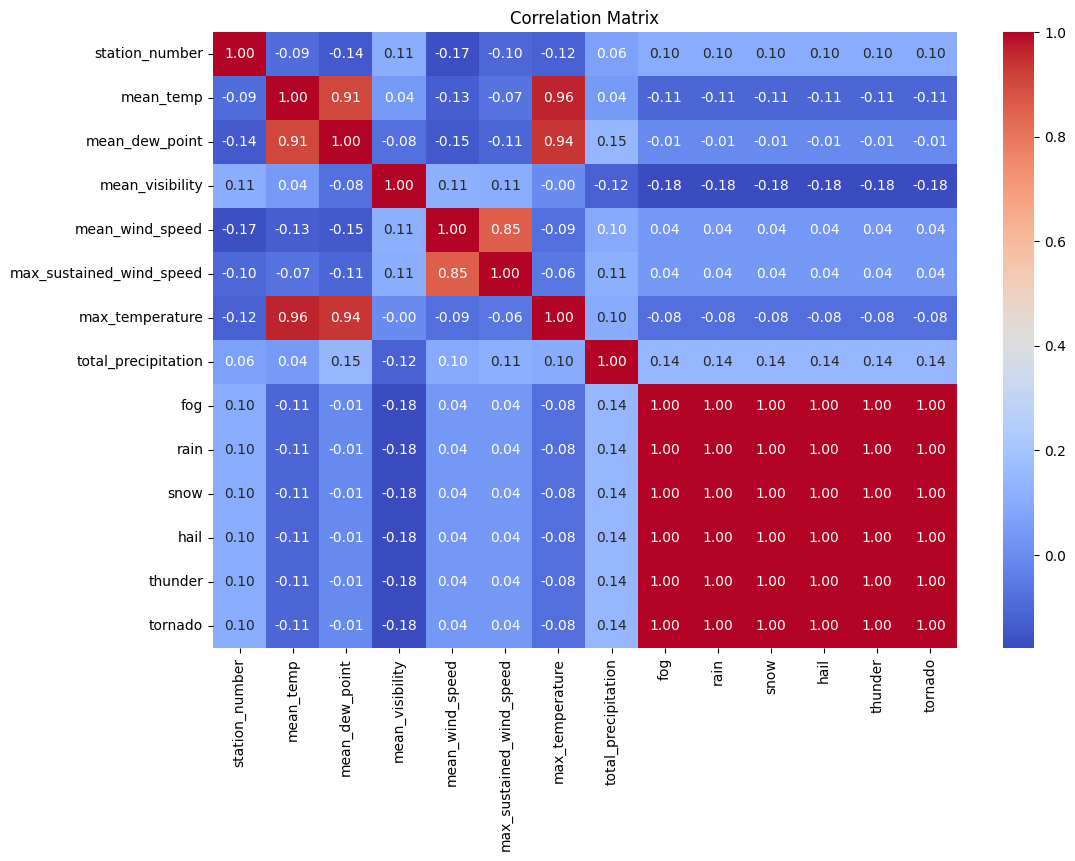

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
weather_data_no_date = weather_data.drop(columns=['date'])

correlation_matrix = weather_data_no_date.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [16]:
# also drop variables that have a correlation of 1.00 with outcome variable 'snow'
columns_to_drop = [
    'fog',
    'hail',
    'thunder',
    'tornado',
    'rain'
]

weather_data = weather_data.drop(columns=columns_to_drop)

In [17]:
# check data types
print(weather_data.dtypes)

date                         object
station_number                Int64
mean_temp                   float64
mean_dew_point              float64
mean_visibility             float64
mean_wind_speed             float64
max_sustained_wind_speed    float64
max_temperature             float64
total_precipitation         float64
snow                        boolean
dtype: object


In [18]:
# further handling of missing values by filling missing values with the mean of the column
numeric_cols = weather_data.select_dtypes(include=['number']).columns

weather_data[numeric_cols] = weather_data[numeric_cols].fillna(weather_data[numeric_cols].mean())

In [19]:
# check for duplicates and remove them
weather_data.drop_duplicates(inplace=True)

In [20]:
# Reset the index
weather_data.reset_index(drop=True, inplace=True)

In [21]:
# summary statistics
print(weather_data.describe(include='all'))

              date  station_number      mean_temp  mean_dew_point  \
count       377784        377784.0  377784.000000   377784.000000   
unique        1824            <NA>            NaN             NaN   
top     2005-03-09            <NA>            NaN             NaN   
freq           212            <NA>            NaN             NaN   
mean           NaN   725646.806572      48.626222       36.668910   
std            NaN      271.762542      19.443145       18.107596   
min            NaN        725300.0     -28.299999      -30.799999   
25%            NaN        725434.0      34.000000       23.799999   
50%            NaN        725527.0      49.500000       35.799999   
75%            NaN        725846.0      65.300003       51.299999   
max            NaN        726284.0     108.300003       81.300003   

        mean_visibility  mean_wind_speed  max_sustained_wind_speed  \
count     377784.000000    377784.000000             377784.000000   
unique              NaN        

In [22]:
weather_data.head()

,date,station_number,mean_temp,mean_dew_point,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_temperature,total_precipitation,snow
0,2005-01-01,725845,26.100000,25.200001,0.9,12.0,20.0,24.799999,0.14,True
1,2005-01-01,725958,29.299999,23.900000,8.1,7.7,15.9,18.000000,0.11,True
2,2005-01-01,725466,29.799999,20.700001,8.8,8.6,15.0,26.600000,0.00,True
3,2005-01-01,725477,29.700001,18.500000,7.3,11.1,20.0,26.600000,0.00,True
4,2005-01-01,725376,34.799999,25.299999,10.0,7.4,12.0,24.799999,0.00,False


### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for should constitute your test set.

In [23]:
import datetime as dt

cutoff_date = str((dt.datetime.today() - dt.timedelta(days=(15*365+3)))).split(' ')[0]

In [24]:
from sklearn.model_selection import train_test_split

weather_data['date'] = pd.to_datetime(weather_data['date'])

# ensure no data point with the cutoff date is in the training or evaluation set
test_data = weather_data[weather_data['date'] == cutoff_date]
remaining_data = weather_data[weather_data['date'] != cutoff_date]

# stratified split to maintain class balance
train_data, temp_data, y_train, y_temp = train_test_split(
    remaining_data, remaining_data['snow'], test_size=0.2, stratify=remaining_data['snow'], random_state=42
)

eval_data, test_data_additional, y_eval, y_test_additional = train_test_split(
    temp_data, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# add additional test data to the test set, ensuring no overlap
test_data = pd.concat([test_data, test_data_additional])

print("Training data length:", len(train_data))
print("Evaluation data length:", len(eval_data))
print("Test data length:", len(test_data))


Training data length: 302063
Evaluation data length: 37758
Test data length: 37963


## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

You are allowed to use any library you are comfortable with such as sklearn, tensorflow, keras etc.
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1.

### Logistic Regression algorithm from scikit-learn library

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train = train_data.drop(columns=['date', 'snow'])
y_train = train_data['snow']
X_eval = eval_data.drop(columns=['date', 'snow'])
y_eval = eval_data['snow']
X_test = test_data.drop(columns=['date', 'snow'])
y_test = test_data['snow']

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

predictions_eval_logistic = logistic_model.predict(X_eval)

predictions_test_logistic = logistic_model.predict(X_test)

accuracy_eval_logistic = accuracy_score(y_eval, predictions_eval_logistic)
print("Accuracy on evaluation data:", accuracy_eval_logistic)

accuracy_test_logistic = accuracy_score(y_test, predictions_test_logistic)
print("Accuracy on test data:", accuracy_test_logistic)

Accuracy on evaluation data: 0.8947772657450077
Accuracy on test data: 0.8950557121407686


### Random Forest classifier algorithm from scikit-learn library

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions_eval = model.predict(X_eval)

predictions_test = model.predict(X_test)

accuracy_eval = accuracy_score(y_eval, predictions_eval)
print("Accuracy on evaluation data:", accuracy_eval)

accuracy_test = accuracy_score(y_test, predictions_test)
print("Accuracy on test data:", accuracy_test)

Accuracy on evaluation data: 0.9224535197838869
Accuracy on test data: 0.9213971498564392


In [28]:
from sklearn.metrics import confusion_matrix, classification_report

# confusion matrix and classification report
y_eval_pred = model.predict(X_eval)
y_test_pred = model.predict(X_test)

conf_matrix_eval = confusion_matrix(y_eval, y_eval_pred)
class_report_eval = classification_report(y_eval, y_eval_pred)

conf_matrix_test = confusion_matrix(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)

print("Evaluation Data:")
print("Confusion Matrix:\n", conf_matrix_eval)
print("Classification Report:\n", class_report_eval)

print("Test Data:")
print("Confusion Matrix:\n", conf_matrix_test)
print("Classification Report:\n", class_report_test)

Evaluation Data:
Confusion Matrix:
 [[33162   623]
 [ 2305  1668]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     33785
         1.0       0.73      0.42      0.53      3973

    accuracy                           0.92     37758
   macro avg       0.83      0.70      0.75     37758
weighted avg       0.91      0.92      0.91     37758

Test Data:
Confusion Matrix:
 [[33393   586]
 [ 2398  1586]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.96     33979
         1.0       0.73      0.40      0.52      3984

    accuracy                           0.92     37963
   macro avg       0.83      0.69      0.74     37963
weighted avg       0.91      0.92      0.91     37963



In [29]:
# predict if it will snow on the prediction date

weather_data['date'] = pd.to_datetime(weather_data['date']).dt.date
train_data['date'] = pd.to_datetime(train_data['date']).dt.date
eval_data['date'] = pd.to_datetime(eval_data['date']).dt.date
test_data['date'] = pd.to_datetime(test_data['date']).dt.date

cutoff_date = pd.to_datetime(cutoff_date).date()
cutoff_date_data = test_data[test_data['date'] == cutoff_date]
print(f"Number of stations on {cutoff_date}: {len(cutoff_date_data)}")

X_cutoff_date = cutoff_date_data.drop(columns=['date', 'snow'])
cutoff_date_predictions = model.predict(X_cutoff_date)

cutoff_date_data = cutoff_date_data.copy()
cutoff_date_data.loc[:, 'predicted_snow'] = cutoff_date_predictions

print(cutoff_date_data[['station_number', 'predicted_snow']])

num_stations_snow = (cutoff_date_data['predicted_snow'] == 1.0).sum()
print(f"Number of stations predicted to have snow on {cutoff_date}: {num_stations_snow}")

if num_stations_snow > len(cutoff_date_data) / 2:
    print(f"It is predicted to snow on {cutoff_date}.")
else:
    print(f"It is not predicted to snow on {cutoff_date}.")


Number of stations on 2009-05-31: 205
        station_number  predicted_snow
333356          725460             0.0
333357          725488             0.0
333358          725940             0.0
333359          725466             0.0
333360          725414             0.0
...                ...             ...
333556          725525             0.0
333557          725865             0.0
333558          725384             0.0
333559          725489             0.0
333560          726055             0.0

[205 rows x 2 columns]
Number of stations predicted to have snow on 2009-05-31: 3
It is not predicted to snow on 2009-05-31.


# **Final conclusion: It is not predicted to snow tomorrow 15 years ago.**

This prediction demonstrates a robust test accuracy of 0.921, showcasing the model's strong performance within the given timeframe.

To further enhance accuracy, we could dive into other algorithms such as tensorflow and keras algorithm, feature engineering, hyperparameter tuning, other ensemble techniques like Gradient Boosting Machines (GBM), AdaBoost, or XGBoost, and feature selection.